# DATA 601: HW3



**Learning Objectives**
- Work with realworld datasets that can be compared to a model.
- Apply vectorization concepts to iterative problems.
- Explore different programming paradigms to solve problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Warm up

In this notebook, we'll use file input/output operations provided by Python to read in data from text files. The function needed to read data is provided in the code cell below. You may wish to review the following section from the Python Tutorial:  

- [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [2]:
import re

def fileToList( fname, regexp=r'\W+' ):
    '''Read text from a file using the provided regular expression. If no regular expression is provided, 
    the default behaviour is to split the text into words removing any punctuation and empty strings. 
    The resulting words are returned in a list.'''
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]

<!-- BEGIN QUESTION -->

## Question 1 (15 points)

### Comparing empirically determined frequencies to a model 

##### Motivation: 
It is useful to compare a theoretical distribution visually with a data set to examine if an assumptions about the data is true, this problem provides you an exercises in this comparison.

##### Tools: 
For this question you may use `NumPy` and `matplotlib`. You may also use any built-in data structures or functions. However, please do not use `pandas`. 

##### Overview:
This question asks you to perform a frequency analysis on the first letter of words in the novel "Moby Dick" by Herman Melville, and compare the result with the first letter law (FLL) inspired by Benford's law. For visual comparison, you are asked to graph the result obtained along with the theoretical result to determine how closely the results match.

 
##### Background: 

[Benford’s law](https://en.wikipedia.org/wiki/Benford%27s_law) describes the expected frequency of the leading digit in a set of numbers. Inspired by this law, [Yan et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0378437118310768) have recently proposed a First Letter Law (FLL) that predicts the percentages of first letters in novels. 

An overview of FLL in the context of the English language (26 letters) is as follows.

The probability $p_i$ of the $i$-th ($1 \le i \le 26$) most frequently occurring letter in a novel is given by:
$$
p_i = \frac{26 - 25\log_{26}25 - i \log_{26} i + (i-1) \log_{26} (i-1)}
           {26 \cdot 25 \log_{26} (\tfrac{26}{25})}
$$

For example, the most frequently occurring letter ($i=1$) in an English novel appears with probability:
$$
p_1 = \frac{1 + 25 \log_{26}(\tfrac{26}{25})}{26 \cdot 25 \log_{26}(\tfrac{26}{25})}.
$$

For more details, please consult:

 - _Benford's Law and First Letter of Word_, Xiaoyong Yan, Seong-Gyu Yang, Beom Jun Kim, Petter Minnhagen (Dec. 2017) [arXiv:1712.06074](https://doi.org/10.48550/arXiv.1712.06074)


##### Process: 

##### Step 0)

Reflect on the data. 
- Do you think the novel Moby Dick will exhibit the First Letter Law? Why/why not? 

_Yes I do. Because Mody Dick is nothing more than a collection of English characters, I do not see why it would not follow the First Letter Law._

##### Step 1) 
- Read in the relevant data:

    Use the function `fileToList` (defined above) to read the text file corresponding to the novel Moby Dick (data courtesy of [Project Gutenberg](https://www.gutenberg.org/ebooks/2701)). Please use the function's default behaviour, i.e. you do not need to supply a regular expression.

Now perform the following tasks. 

- Convert all words to lower case.
- For each word, retain only the first letter, drop any word that does not start with a letter ([a-z]).
- Determine the frequency of each of the letters `a` through `z`.
- Calculate the probability of each of the letters occurring in the novel (as first letters) by using the formula $p=frequency/total$.
- Sort the probabilities in descending order. This will give you $p_i$.
- Plot the probability distribution, with $i$ on the horizontal axis and probability on the vertical axis. Also indicate the _rank_ of the letters (which letter is the most frequent, second-most frequent, and so on).
- On the same plot include a plot of the First Letter Law. 

##### Return data types
- For the counts the data type should be an integer
- For the probabilities the data type should be a float

##### Hints:
- You may use `NumPy`, in fact it is recommended. Remember `NumPy` arrays are indexed and you can create an array of `n` zeros using `np.zeros(n)`.
- Use the fact that $(i-1) \log_{26}(i-1)$ for $i=1$ is $0$ to avoid numerical issues when evaluating the FLL formula.
- Independent Probability is defined as the frequency of a particular event divided by the total number of events.
- You can do calculations in line using `NumPy` in `matplotlib`.


Please provide your solution below.

In [6]:
# Read file 
moby = fileToList('moby_dick.txt')

# Convert words to lower case
for i, x in enumerate(moby):
    moby[i] = x.lower()

In [7]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# Drop everything but first letter
for i, x in enumerate(moby):
        moby[i] = moby[i][0]

# Remove any non alphabetical characters
moby = [x for x in moby if x in alphabet]

In [8]:
# Calculate frequency of letters
freq = dict()
for i in moby:
    freq[i] = freq.get(i,0)+1
# Calculate probabilties 
probs = dict()
for i in freq:
    probs[i] = freq[i]/ sum(freq.values())
# Sort by decending 
probs = dict(sorted(probs.items(), key=lambda item: item[1], reverse = True))

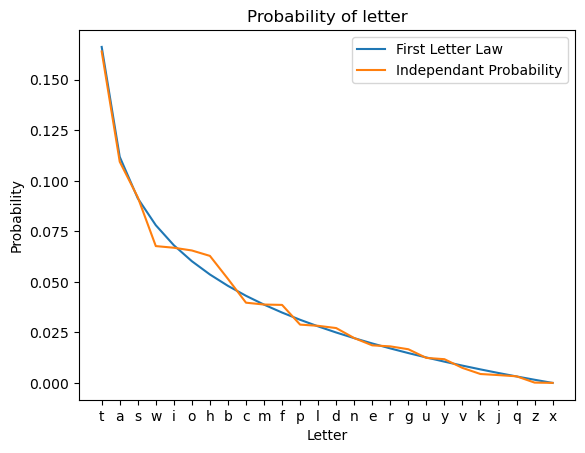

In [9]:
import matplotlib.pyplot as plt
import math 
x = probs.keys()
y = probs.values()
FLL = []
for i, u in enumerate(x):
    if i == 0:
        FLL.append((1+25*math.log((26/25),26))/(26*25*math.log((26/25),26)))
    else:
        FLL.append((26 - 25*math.log(25, 26)-(i+1)*math.log((i+1),26)+((i+1)-1)*math.log(((i+1)-1),26))/(26*25*math.log((26/25),26)))
plt.title("Probability of letter")
plt.ylabel("Probability")
plt.xlabel("Letter")
plt.plot(x,FLL, label = "First Letter Law")
plt.plot(x,y, label = "Independant Probability")
plt.legend()

##### Step 2) 

Calculate the Mean Square Error (MSE) between the distribution your obtained and the one given by the FLL. For this problem, the MSE is given by:
$$
\text{MSE} = \frac{1}{26} \sum_{i=1}^{26} (p_i - \hat{p}_i),
$$
where $p_i$ is the probability given by the FLL and $\hat{p}_i$ is the probability determined from the data. 

In [10]:
MSE = 0 
for i, u  in enumerate(x):
    MSE += (FLL[i] - list(y)[i])**2
MSE = MSE*(1/26)
print(MSE)

1.1437036658850362e-05


##### Step 3)

Comment on your plot and the numerical value of the MSE obtained above. Is the result as expected? Why/Why not? 

_This result is expected. FLL is the predeicted proportion of each letter, and the independant probability is what we observed. Our observed plot follows the FLL plot closly, but not exactly. Out MSE is very small which reiforces this point. Because our MSE is small, we observe little error in our predictions_

<!-- END QUESTION -->

## Question 2 (15 points):

### Visualizing Trends in an Index


###### Motivation: 
This exercise is intended to help you explore and consider the time scale that is used to present data. This question explores graphing data over different time intervals.

###### Tools: 
For this question you may use NumPy and matplotlib. You may also use any built-in data structures or functions,  Please do not use `pandas`.


##### Problem:
In this exercise you will plot the [Air Quality Index](https://aqicn.org/data-platform/register/) (Pm25) along with 7-day and 14-day averages. The provided dataset (in csv format) contains the daily average air quality for the Calgary central monitoring location from Sep. 01, 2020 to Aug 31, 2021 (data obtained from https://aqicn.org/data-platform/register/). 

###### Step 0)

Reflect on the data. What are some of its limitations? (Name two.)

_Type your answer here, replacing this text._

##### Steps: 
- Read the dataset using the `fileToList` function defined above. For this question, use the regular expression `r'[,\r\n]+'` rather than the default. Inspect the result and familiarize yourself with the content of the returned list.
- Observe that the average values are at a daily interval, and that all days have a value recorded. We therefore do not need the date information. Clean up the data and only retain the air quality information. Store the result in a list or a `numpy` array in floating point format.
- Recall that a [simple moving average](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) is defined as the (unweighted) mean over the previous $N$ days.<br> 
Determine the simple moving average of the air quality. The number of days $N$ to average over should be adjustable. If you are using `numpy`, you may find the function [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) helpful.  
- Plot the raw air quality index data along with 7-day and 14-day simple moving average. Plot on the same figure in order to help you visually ascertain the effect of the filter.

##### Return data types:
- The Floating averages should be presented as intergers


##### Hints:
- Generators can be very useful in some situations
- Use plt.legend to create a legend for your plot
- If you get stuck try referring to relevant documentation

Please provide your solution below.

In [11]:
# Read data
airqual = fileToList('calgary-central 2, alberta-air-quality.csv',regexp=r'[,\r\n]+')
airqual.remove('date')
airqual.remove(' pm25')
airvals = [float(x) for x in airqual if '-' not in x]

In [12]:
def SMA(x,N):
    moving_avgs = []
    cutoff = N
    for i, u in enumerate(x):
        if cutoff <= len(x):
            moving_avgs.append(sum(x[i:cutoff])/N)
        cutoff += 1
    return moving_avgs

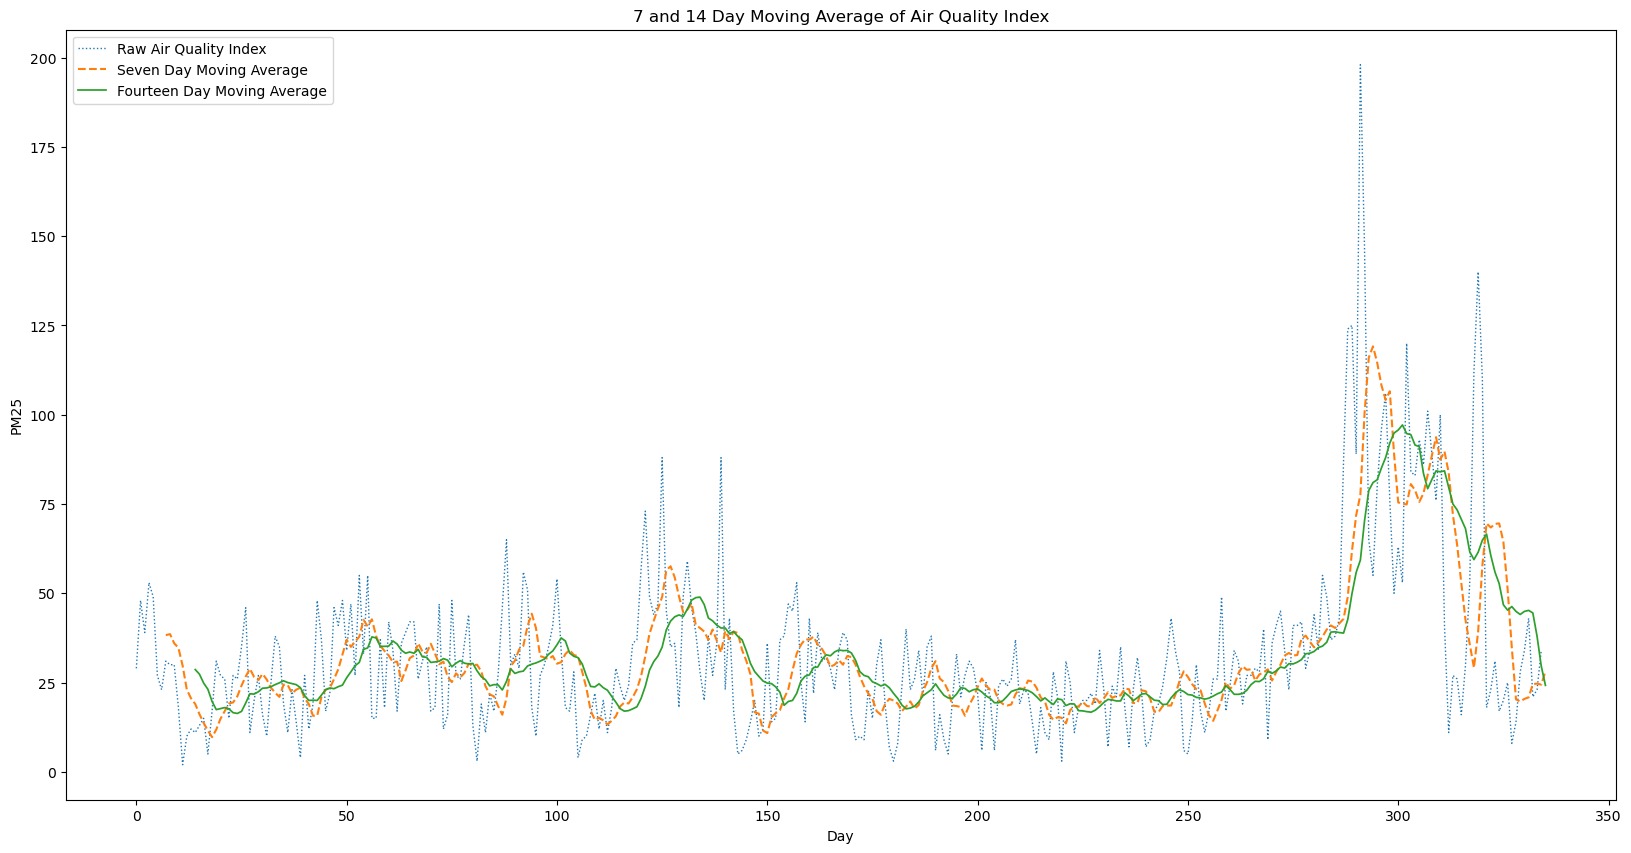

In [14]:
fig = plt.figure()
seven_day = SMA(airvals, 7)
fourteen_day = SMA(airvals, 14)
plt.plot(airvals, label = "Raw Air Quality Index", linewidth = 1, linestyle = 'dotted')
plt.plot(list(range(7, len(airvals)+1)), seven_day, label = "Seven Day Moving Average", linestyle = 'dashed')
plt.plot(list(range(14, len(airvals)+1)), fourteen_day,label = "Fourteen Day Moving Average", linewidth=1.25)
plt.title("7 and 14 Day Moving Average of Air Quality Index")
plt.xlabel("Day")
plt.ylabel("PM25")
fig.set_size_inches(20,10)
plt.legend()



Please use the Markdown cell below to answer the following questions.

- Describe algorithmically how you set out to calculate the moving average. What was your process?
- What is the effect of the moving average filter? 
- In what circumstances would you _not_ want to use a moving average? Do you think that the moving average is appropriate in this case? 




_1. I initialized a cutoff point equal to the size N of the moving average. I then iterated over the air quality list and calculated the average of the values in the window up to the cutoff value. The average is added to a new list and the cutoff is increased by one at the end of loop._ 

_2. The moving average filter smooths the curve and focuses more on the trend and is not affected as much by abnormally large or small values_

_3. You may not want to use a moving average if your data is very inconsistent/ does not show much of a trend. A moving average will try to display a trend and potentially be misleading. I think a movign average is appropriate in case, since the moving average roughly follows the middle of the data and is showing the general trend of the data._